# Measuring Complexity

In this notebook, I explore how effective various complexity measures are by comparing them to the number of changes made to a [remedy](https://github.com/gengstrand/clojure-news-feed/commit/7afaa0dd758adbb04bb0cf7c52619fc03893342a) of the same (or similar) bug in each feed implementation.

## Lines of Code

The first graph compares the average per file number of Lines of Code for each feed with the LoC for each fix (normalized) for that bug.

Text(0.5, 1.0, 'complexity')

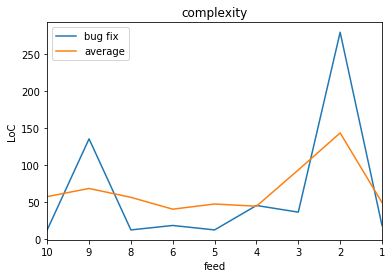

In [16]:
%matplotlib inline
import pandas as pd
input = pd.read_csv("fc.csv")
ax = input[['normalized', 'avg']].plot()
ax.set_xlabel("feed")
ax.set_xticklabels(input["feed"])
ax.legend(["bug fix", "average"])
ax.set_ylabel("LoC")
ax.set_title("complexity")

## Cyclomatic Complexity

McCabe Cyclomatic Complexity is a measure of the number of different code paths in a program. It is used mostly as an upper bound on the number of unit tests needed. This graph shows cyclomatic complexity per feed. 

Text(0.5, 1.0, 'complexity')

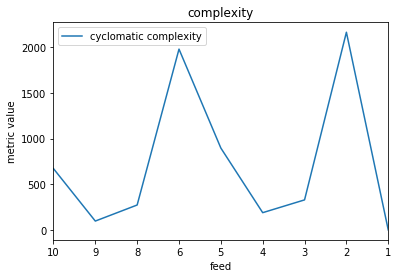

In [15]:
%matplotlib inline
import pandas as pd
input = pd.read_csv("fc.csv")
ax = input[['CC']].plot()
ax.set_xlabel("feed")
ax.set_xticklabels(input["feed"])
ax.legend(["cyclomatic complexity"])
ax.set_ylabel("metric value")
ax.set_title("complexity")

## Pairwise Correlation

Using the pearson standard correlation coefficient, average per file LoC correlated with the bug fix LoC almost twice as well as the CC measure.

In [14]:
import pandas as pd
input = pd.read_csv("fc.csv")
input[['normalized', 'CC', 'avg']].corr(method = "pearson")

,normalized,CC,avg
normalized,1.000000,0.479154,0.858368
CC,0.479154,1.000000,0.432308
avg,0.858368,0.432308,1.000000
